In [1]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
%matplotlib inline

---

- ### cv2.merge([b, g, r])
    - #### 여러개의 단일 채널 배열을 다채널 배열로 합성

In [8]:
height = 2
width = 4

ch0 = np.zeros((height, width), dtype='uint8') + 10
ch1 = np.ones((height, width), dtype='uint8') * 20
ch2 = np.full((2, 4), 30, dtype='uint8')

channel_names = ["blue", "green", "red"]
for i, channel in enumerate(channel_names):
    print("{} channel:".format(channel))
    print(eval("ch{}".format(i)))
    print()

blue channel:
[[10 10 10 10]
 [10 10 10 10]]

green channel:
[[20 20 20 20]
 [20 20 20 20]]

red channel:
[[30 30 30 30]
 [30 30 30 30]]



- #### 한 픽셀 (B, G, R)인 2x4 형태의 color image 생성

In [11]:
merged = cv2.merge([ch0, ch1, ch2])
merged

array([[[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]],

       [[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]]], dtype=uint8)

In [12]:
merged.shape

(2, 4, 3)

---

- ### cv2.split(image)
    - #### 다채널 이미지를 여러 개의 단일 채널로 변경
    - #### 3 X 2 X 4 형태의 배열 리턴

In [13]:
cv2.split(merged)

(array([[10, 10, 10, 10],
        [10, 10, 10, 10]], dtype=uint8),
 array([[20, 20, 20, 20],
        [20, 20, 20, 20]], dtype=uint8),
 array([[30, 30, 30, 30],
        [30, 30, 30, 30]], dtype=uint8))

In [15]:
np.array(cv2.split(merged)).shape

(3, 2, 4)

---

- ## 이미지의 컬러 채널 분리

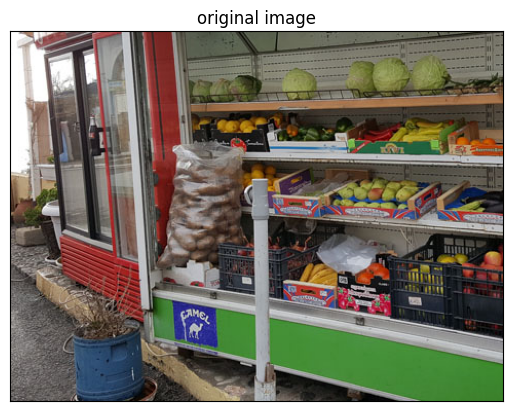

In [2]:
image = cv2.imread("./images/chap05/color.jpg", cv2.IMREAD_COLOR)
show_rgb_image(image, "original image")

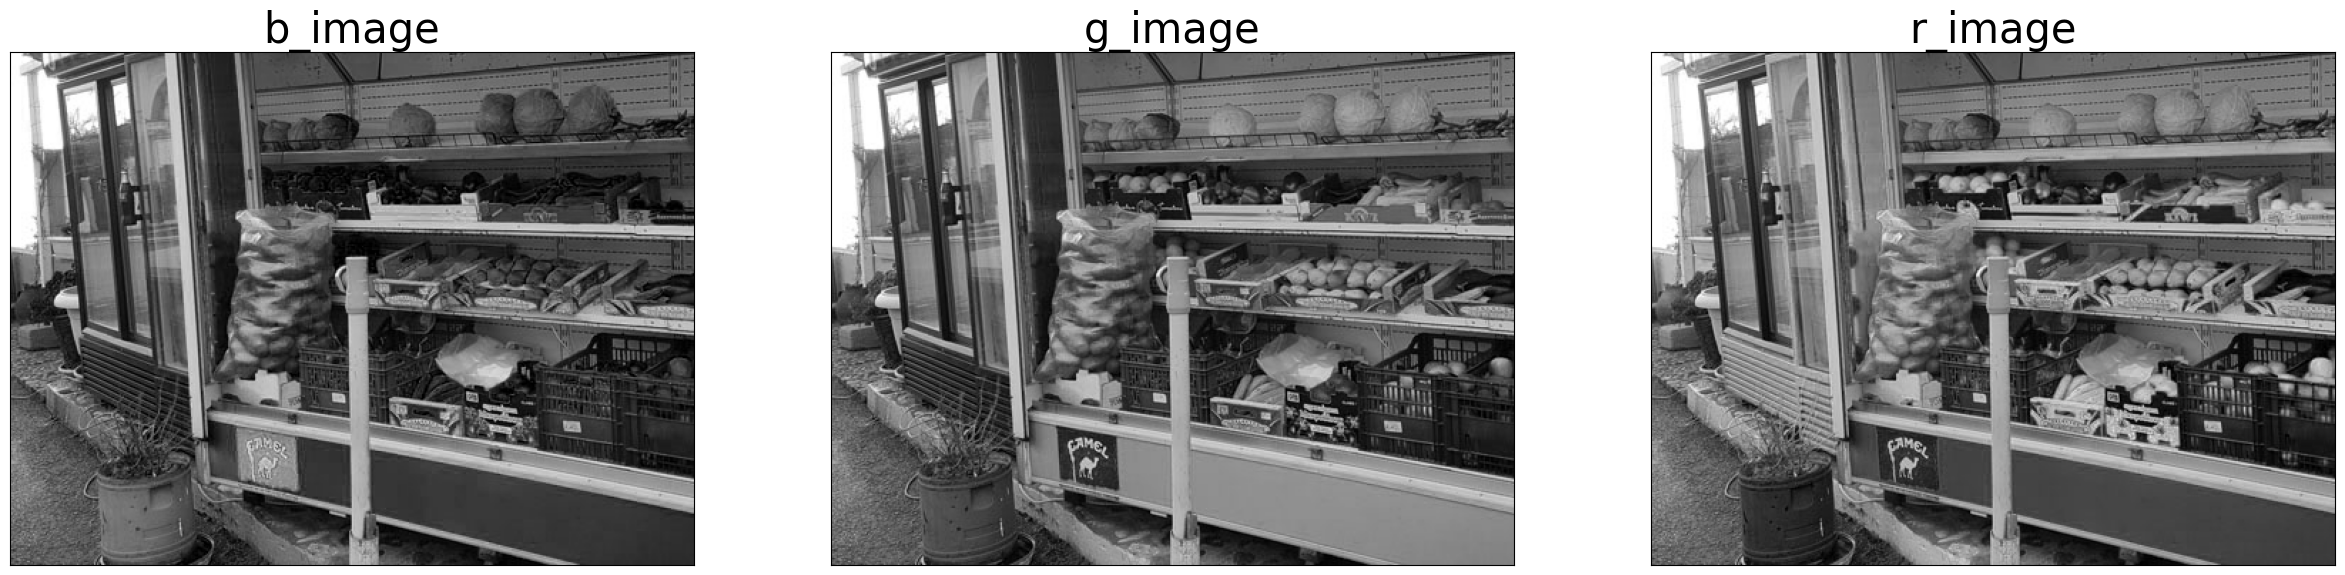

In [16]:
b_image, g_image, r_image = cv2.split(image)

show_images({"b_image": b_image, "g_image": g_image, "r_image": r_image}, 30)

---

- ## 행렬 산술 연산

In [47]:
m1 = np.full((3, 6), 10, dtype='uint8')
m2 = np.full((3, 6), 50, dtype='uint8')

m_mask = np.zeros((3, 6), dtype='uint8')
m_mask[:,3:] = 1

"m1: ", m1, "m2: ", m2, "m_mask: ", m_mask

('m1: ',
 array([[10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10]], dtype=uint8),
 'm2: ',
 array([[50, 50, 50, 50, 50, 50],
        [50, 50, 50, 50, 50, 50],
        [50, 50, 50, 50, 50, 50]], dtype=uint8),
 'm_mask: ',
 array([[0, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1, 1]], dtype=uint8))

<br><br>

- ### cv2.add(src1, src2, mask)
    - #### mask가 0이 아닌 영역만 계산, 0인 영역은 0)

In [50]:
cv2.add(m1, m2)

array([[60, 60, 60, 60, 60, 60],
       [60, 60, 60, 60, 60, 60],
       [60, 60, 60, 60, 60, 60]], dtype=uint8)

In [51]:
cv2.add(m1, m2, mask=m_mask)

array([[ 0,  0,  0, 60, 60, 60],
       [ 0,  0,  0, 60, 60, 60],
       [ 0,  0,  0, 60, 60, 60]], dtype=uint8)

<br><br>

- ### cv2.divide(src1, src2)

> #### m1, m2 둘다 dtype이 uint8이므로 소수점 이하는 버려진다.

In [53]:
cv2.divide(m1, m2)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

> #### array.astype(dtype), np.dtype(array)로 타입 변환 가능

In [57]:
cv2.divide(m1.astype('float32'), np.float32(m2))

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)

<br><br>

- ### cv2.magnitude(x, y)
    - #### 벡터의 크기 리턴
    - $$\sqrt{x^2 + y ^ 2}$$

In [59]:
x = np.array([1, 2, 3, 5, 10], dtype='float32')
y = np.array([2, 5, 7, 2, 9], dtype='float32')
x, y

(array([ 1.,  2.,  3.,  5., 10.], dtype=float32),
 array([2., 5., 7., 2., 9.], dtype=float32))

In [61]:
cv2.magnitude(x, y)

array([[ 2.236068 ],
       [ 5.3851647],
       [ 7.6157737],
       [ 5.3851647],
       [13.453624 ]], dtype=float32)

- ### cv2.phase(x, y)
    - #### 사잇각 리턴
    - $$\arctan(y/x)$$

In [62]:
cv2.phase(x, y)

array([[1.1071129],
       [1.1902124],
       [1.1658309],
       [0.3805839],
       [0.7329612]], dtype=float32)

<br><br>

- ### cv2.cartToPolar(x, y)
    - #### Polar: 각좌표계
    - #### (r, theta) 리턴

In [67]:
r, theta = cv2.cartToPolar(x, y)
r, theta

(array([[ 2.236068 ],
        [ 5.3851647],
        [ 7.6157737],
        [ 5.3851647],
        [13.453624 ]], dtype=float32),
 array([[1.1071129],
        [1.1902124],
        [1.1658309],
        [0.3805839],
        [0.7329612]], dtype=float32))

- ### cv2.polarToCart(r, theta)
    - #### Cartesian: 직각좌표계
    - #### (x, y) 리턴
        - #### float연산 오차 존재

In [69]:
cv2.polarToCart(r, theta)

(array([[1.0000718],
        [2.000388 ],
        [3.000516 ],
        [4.999845 ],
        [9.998684 ]], dtype=float32),
 array([[1.9999641],
        [4.9998446],
        [6.999779 ],
        [2.0003877],
        [9.00146  ]], dtype=float32))

---

- ## 이미지 논리 비트 연산

- #### 가운데 하얀 원 그려진 이미지 생성

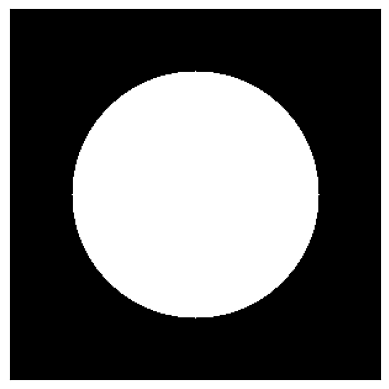

In [30]:
w, h = (300, 300)

image1 = np.zeros((w, h), dtype='uint8')
cv2.circle(image1, (w // 2, h // 2), 100, 255, -1)

show_rgb_image(image1)

- #### 왼쪽 절반이 하얀색인 이미지 생성

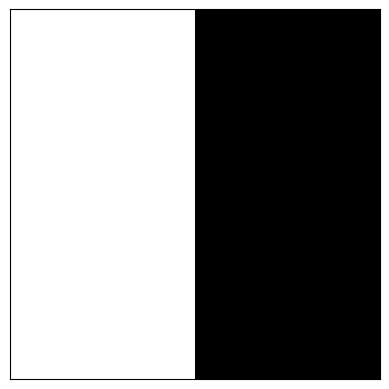

In [31]:
image2 = np.zeros((300, 300), dtype='uint8')
image2[:, : w // 2] = 255

show_rgb_image(image2)

<br><br>

- #### bitwise 연산 결과

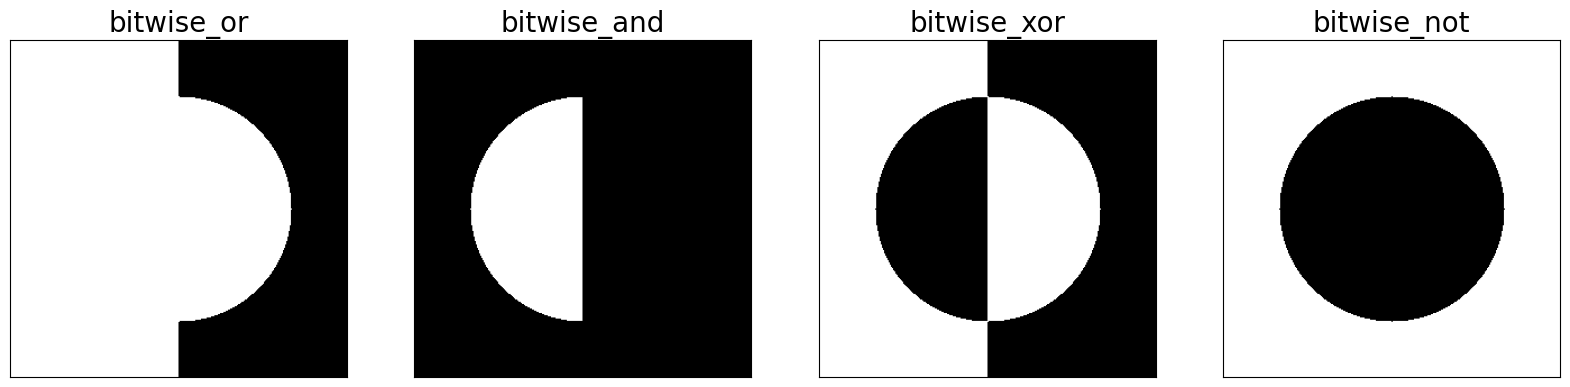

In [32]:
image_dict = {}
image_dict["bitwise_or"] = cv2.bitwise_or(image1, image2)
image_dict["bitwise_and"] = cv2.bitwise_and(image1, image2)
image_dict["bitwise_xor"] = cv2.bitwise_xor(image1, image2)
image_dict["bitwise_not"] = cv2.bitwise_not(image1)

show_images(image_dict, 20)

---

- ## 이미지 논리 비트 연산 2

In [6]:
logo = cv2.imread(".\images\chap05\logo.jpg", cv2.IMREAD_COLOR)

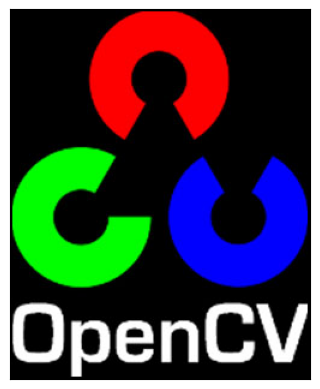

In [7]:
show_rgb_image(logo)

- ### cv2.threshold(image, start, end, type)
    - #### 이미지 임계처리
    - #### (사용된 임계값, 출력 영상) 리턴
    - #### type=cv2.THRESH_BINARY
        - #### 이미지의 start~end-1 값을 max_val, 이외 0으로 이진화

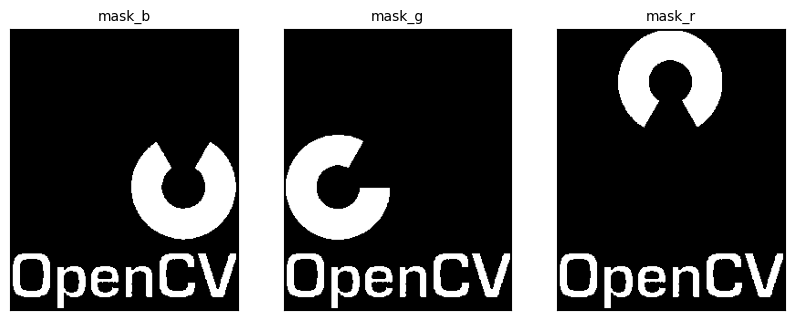

In [18]:
_, mask = cv2.threshold(logo, 220, 255, cv2.THRESH_BINARY)
mask_b, mask_g, mask_r = cv2.split(mask)

show_images({"mask_b": mask_b, "mask_g": mask_g, "mask_r": mask_r}, 10)

- ### B, G, R bitwise OR연산으로 전경 통과 mask 생성

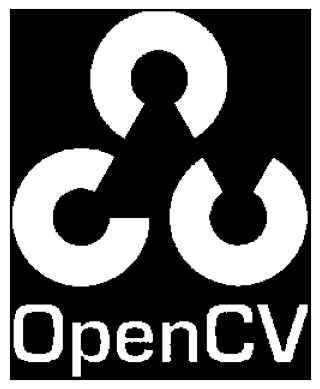

In [21]:
fg_pass_mask = cv2.bitwise_or(mask_b, mask_g)
fg_pass_mask = cv2.bitwise_or(fg_pass_mask, mask_r)

show_rgb_image(fg_pass_mask)

- ### 배경 통과 mask 생성

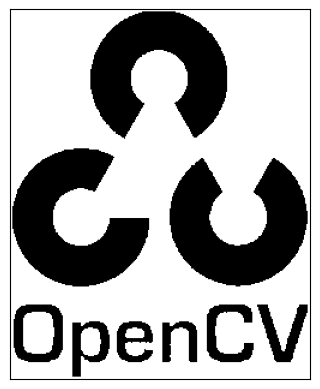

In [20]:
bg_pass_mask = cv2.bitwise_not(fg_pass_mask)
show_rgb_image(bg_pass_mask)

- ### 로고를 집어넣을 관심 영역 설정

46 195


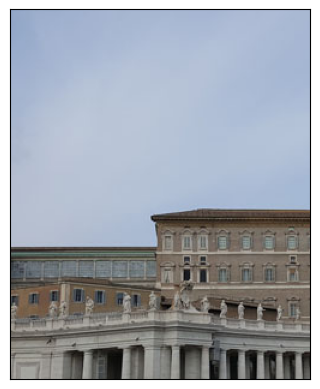

In [22]:
image = cv2.imread("./images/chap05/bit_test.jpg", cv2.IMREAD_COLOR)

W, H = image.shape[:2]
w, h = logo.shape[:2]

start_x, start_y = ((W - w) // 2, (H - h) // 2)
print(start_x, start_y)

roi = image[start_x: start_x + w, start_y: start_y + h]
show_rgb_image(roi)

- ### foreground, background

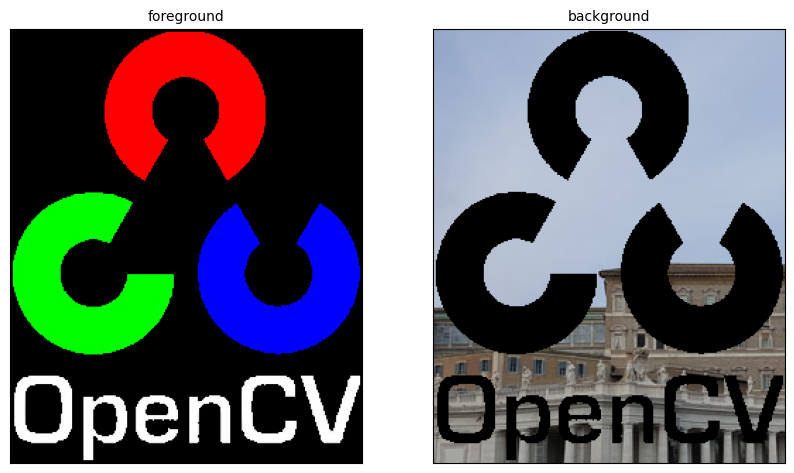

In [25]:
foreground = cv2.bitwise_and(logo, logo, mask=fg_pass_mask)
background = cv2.bitwise_and(roi, roi, mask=bg_pass_mask)

show_images({"foreground": foreground, "background": background}, 10)

- ### 관심 영역에 들어갈 이미지 생성

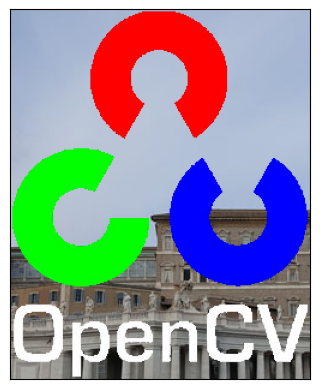

In [161]:
roi_image = cv2.add(background, foreground)
show_rgb_image(roi_image)

- ### image에 합성

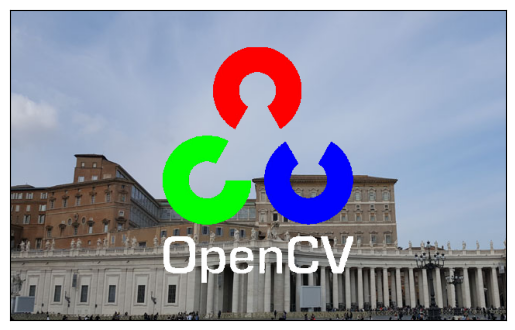

In [163]:
image[start_x: start_x + w, start_y: start_y + h] = roi_image
show_rgb_image(image)

---